In [1]:
""" 
For the given dataset on bank, perform the following task based on the preliminary analysis of a positive response (term deposit) to direct calls 
from a bank. In essence, the task is a matter of bank scoring, i.e according to the characteristics of a client (potential client), their behaviour
is predicted(loan default,a wish to make a deposit, etc).
For the given dataset, make a visual analysis in order to plan marketing banking campaigns more effectively and also give answers to set of questions
that may be relevant when analyzing banking data:
1. What is the share of Clients attracted in our source data?
2. What are the mean values of numerical features among the attracted clients?
3. What is the average call duration for the attracted clients?
4. what is the average age among the attracted and unmarried clients?
5. What is the average age and call duration for different types of client employment?

"""

' \nFor the given dataset on bank, perform the following task based on the preliminary analysis of a positive response (term deposit) to direct calls \nfrom a bank. In essence, the task is a matter of bank scoring, i.e according to the characteristics of a client (potential client), their behaviour\nis predicted(loan default,a wish to make a deposit, etc).\nFor the given dataset, make a visual analysis in order to plan marketing banking campaigns more effectively and also give answers to set of questions\nthat may be relevant when analyzing banking data:\n1. What is the share of Clients attracted in our source data?\n2. What are the mean values of numerical features among the attracted clients?\n3. What is the average call duration for the attracted clients?\n4. what is the average age among the attracted and unmarried clients?\n5. What is the average age and call duration for different types of client employment?\n\n'

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's in a CSV file)
data = pd.read_csv('bank-additional-full.csv')



1. Share of Clients Attracted in count:
no     36548
yes     4640
Name: response, dtype: int64
1. Share of Clients Attracted in percentage:
no     88.734583
yes    11.265417
Name: response, dtype: float64


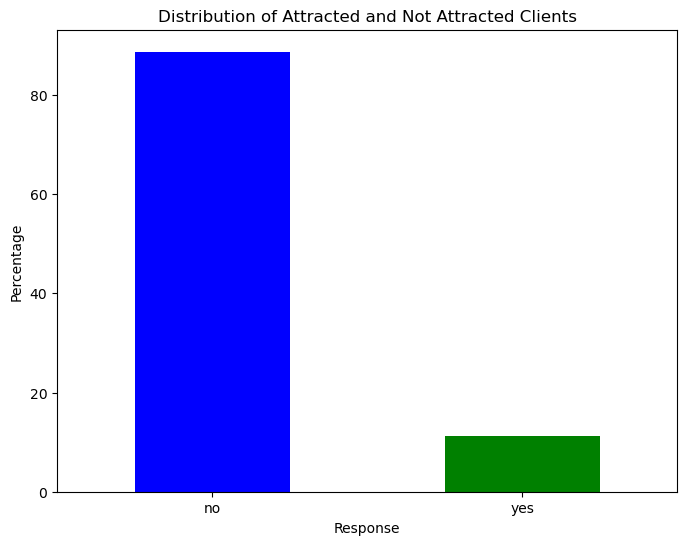

In [3]:
# 1. What is the share of Clients attracted in our source data?
attraction_counts = data['response'].value_counts()
print(f"1. Share of Clients Attracted in count:")
print(attraction_counts)
attraction_percentage = (attraction_counts / len(data)) * 100
print(f"1. Share of Clients Attracted in percentage:")
print(attraction_percentage)
#visualization
plt.figure(figsize=(8, 6))
attraction_percentage.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Response')
plt.ylabel('Percentage')
plt.title('Distribution of Attracted and Not Attracted Clients')
plt.xticks(rotation=0)
plt.show()

C:\Users\faiza\AppData\Local\Temp\ipykernel_2520\2819704793.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values_attracted = data[data['response'] == 'yes'].mean()



2. Mean Values of Numerical Features for Attracted Clients:
age                 40.913147
duration           553.191164
campaign             2.051724
pdays              792.035560
previous             0.492672
emp.var.rate        -1.233448
cons.price.idx      93.354386
cons.conf.idx      -39.789784
euribor3m            2.123135
nr.employed       5095.115991
dtype: float64


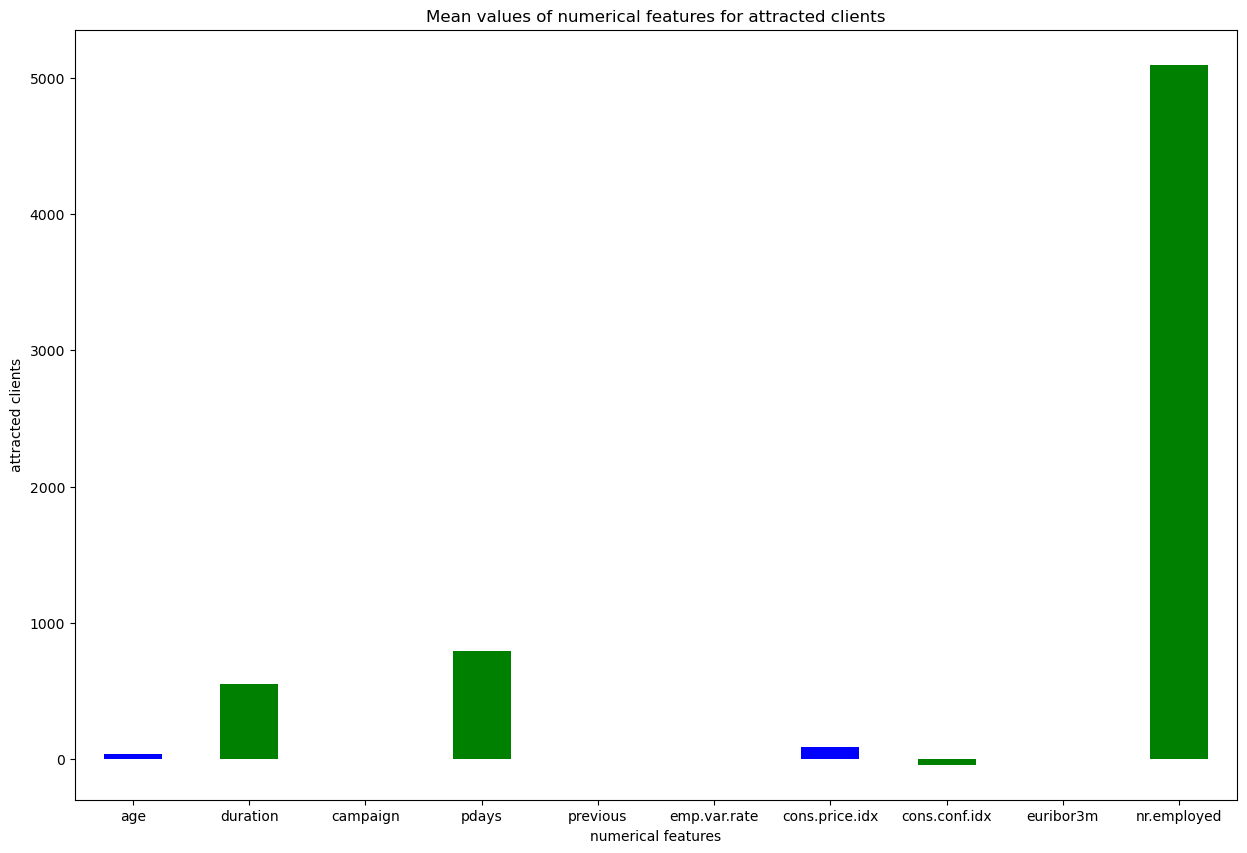

In [4]:
# 2. Mean values of numerical features for attracted clients
mean_values_attracted = data[data['response'] == 'yes'].mean()
print("\n2. Mean Values of Numerical Features for Attracted Clients:")
print(mean_values_attracted)
#visualization
plt.figure(figsize=(15, 10))
mean_values_attracted.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('numerical features')
plt.ylabel('attracted clients')
plt.title('Mean values of numerical features for attracted clients')
plt.xticks(rotation=0)
plt.show()


In [5]:
# 3. Average call duration for attracted clients
average_call_duration = data[data['response'] == 'yes']['duration'].mean()
print(f"\n3. Average Call Duration for Attracted Clients: {average_call_duration:.2f} seconds")   



3. Average Call Duration for Attracted Clients: 553.19 seconds


In [6]:
# 4. Average age among attracted and unmarried clients
average_age_unmarried_attracted = data[(data['response'] == 'yes') & (data['marital'] == 'single')]['age'].mean()
print(f"\n4. Average Age Among Attracted and Unmarried Clients: {average_age_unmarried_attracted:.2f} years")


4. Average Age Among Attracted and Unmarried Clients: 31.35 years


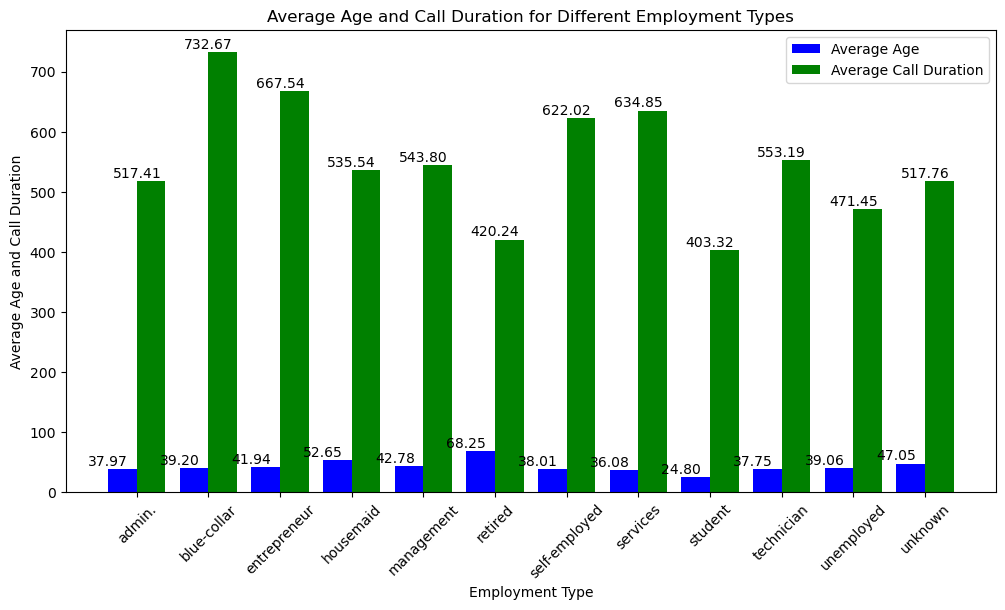

In [7]:
# 5. Average age and call duration for different employment types

attracted_clients = data[data['response'] == 'yes']

# Calculate average age and call duration for different employment types
employment_stats = attracted_clients.groupby('job')[['age', 'duration']].mean()

# Create a grouped bar chart with numbering
plt.figure(figsize=(12, 6))
x = range(len(employment_stats))
width = 0.4

plt.bar(x, employment_stats['age'], width=width, label='Average Age', color='blue', align='center')
plt.bar([i + width for i in x], employment_stats['duration'], width=width, label='Average Call Duration', color='green', align='center')

plt.xlabel('Employment Type')
plt.ylabel('Average Age and Call Duration')
plt.title('Average Age and Call Duration for Different Employment Types')
plt.xticks([i + width / 2 for i in x], employment_stats.index, rotation=45)

# Add numbering on each individual plot
for i, (age, duration) in enumerate(zip(employment_stats['age'], employment_stats['duration'])):
    plt.text(i - width / 2, age + 1, f'{age:.2f}', ha='center', va='bottom', color='black')
    plt.text(i + width / 2, duration + 1, f'{duration:.2f}', ha='center', va='bottom', color='black')

plt.legend(loc='upper right')
plt.show()

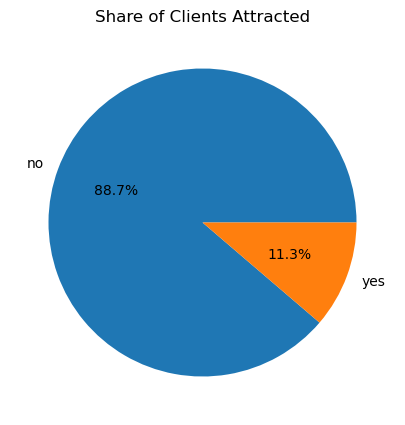

In [8]:
# Visualizations
plt.figure(figsize=(10, 5))
plt.pie(attraction_counts, labels=attraction_counts.index, autopct='%1.1f%%')
plt.title('Share of Clients Attracted')
plt.show()